## Random Forest Model

In [1]:
import numpy as np
import pandas as pd

In [2]:
feature_pickle = '/Users/Xiaoxi/Desktop/BitTiger/Capstone/data/output/modified_features_and_label.pkl'
df = pd.read_pickle(feature_pickle)
df.head()

,uid,song_popular,device,major_song_type,song_popularity_ratio,total_play_time,avg_play_time,least_pop_count,most_popular_count,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,count_in_recent_5week,label,avg_complete_ratio,days_since_last_play,active_days,play_time_bins
0,100077577,0.176471,ip,0,0.176471,3.466667,12.235294,0.0,10.0,0,0,0,17,0,1,0.751198,22,1,"[0.0, 100.0)"
1,100419770,0.113208,ar,1,0.113208,115335.033333,130567.962264,1.0,15.0,0,0,38,15,0,0,1.000000,13,7,"[10000.0, inf)"
2,100474444,0.579710,ar,0,0.579710,113.666667,98.840580,0.0,67.0,0,0,0,69,0,1,0.414544,21,1,"[100.0, 400.0)"
3,100751531,0.346154,ar,1,0.346154,42.183333,97.346154,4.0,13.0,0,0,0,0,26,1,0.451495,48,3,"[0.0, 100.0)"
4,101231687,0.196989,ar,0,0.196989,2962.783333,235.158093,0.0,557.0,169,83,368,177,0,0,0.886859,0,14,"[1000.0, 7000.0)"


In [3]:
df = df.set_index('uid')
df.shape

(73494, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73494 entries, 100077577 to 99996283
Data columns (total 18 columns):
song_popular             73494 non-null float64
device                   73494 non-null object
major_song_type          73494 non-null object
song_popularity_ratio    73494 non-null float64
total_play_time          73494 non-null float64
avg_play_time            73481 non-null float64
least_pop_count          73494 non-null float64
most_popular_count       73494 non-null float64
count_in_recent_1week    73494 non-null int64
count_in_recent_2week    73494 non-null int64
count_in_recent_3week    73494 non-null int64
count_in_recent_4week    73494 non-null int64
count_in_recent_5week    73494 non-null int64
label                    73494 non-null int64
avg_complete_ratio       73494 non-null float64
days_since_last_play     73494 non-null int64
active_days              73494 non-null int64
play_time_bins           73494 non-null object
dtypes: float64(7), int64(8), object(3)


In [5]:
df.isnull().sum(axis = 0)

song_popular              0
device                    0
major_song_type           0
song_popularity_ratio     0
total_play_time           0
avg_play_time            13
least_pop_count           0
most_popular_count        0
count_in_recent_1week     0
count_in_recent_2week     0
count_in_recent_3week     0
count_in_recent_4week     0
count_in_recent_5week     0
label                     0
avg_complete_ratio        0
days_since_last_play      0
active_days               0
play_time_bins            0
dtype: int64

In [6]:
df.loc[df.avg_play_time.isnull() == True]

,song_popular,device,major_song_type,song_popularity_ratio,total_play_time,avg_play_time,least_pop_count,most_popular_count,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,count_in_recent_5week,label,avg_complete_ratio,days_since_last_play,active_days,play_time_bins
uid,,,,,,,,,,,,,,,,,,
152008611,0.00,ar,2,0.00,0.0,NaN,0.0,0.0,0,0,0,0,5,1,0.0,51,1,"[0.0, 100.0)"
154360119,0.00,ar,0,0.00,0.0,NaN,5.0,0.0,0,0,0,0,5,1,1.0,51,1,"[0.0, 100.0)"
154422795,0.00,ar,0,0.00,0.0,NaN,0.0,2.0,0,0,0,0,3,1,1.0,51,1,"[0.0, 100.0)"
154499254,0.00,ar,0,0.00,0.0,NaN,0.0,30.0,0,0,0,0,30,1,1.0,51,1,"[0.0, 100.0)"
154617424,0.00,ar,0,0.00,0.0,NaN,0.0,0.0,0,0,0,0,4,1,1.0,51,1,"[0.0, 100.0)"
154619852,0.00,ar,2,0.00,0.0,NaN,0.0,0.0,0,0,0,0,4,1,0.0,50,2,"[0.0, 100.0)"
154639829,0.00,ar,0,0.00,0.0,NaN,0.0,19.0,0,0,0,0,19,1,1.0,51,1,"[0.0, 100.0)"
154685455,0.00,ar,0,0.00,0.0,NaN,0.0,10.0,0,0,0,0,10,1,1.0,49,2,"[0.0, 100.0)"
154711370,0.00,ar,2,0.00,0.0,NaN,0.0,0.0,0,0,0,0,3,1,0.0,49,1,"[0.0, 100.0)"


In [7]:
df.loc[df.avg_play_time.isnull() == True, 'avg_play_time'] = 0

In [8]:
df.isnull().sum(axis = 0)

song_popular             0
device                   0
major_song_type          0
song_popularity_ratio    0
total_play_time          0
avg_play_time            0
least_pop_count          0
most_popular_count       0
count_in_recent_1week    0
count_in_recent_2week    0
count_in_recent_3week    0
count_in_recent_4week    0
count_in_recent_5week    0
label                    0
avg_complete_ratio       0
days_since_last_play     0
active_days              0
play_time_bins           0
dtype: int64

In [9]:
df.describe()

,song_popular,song_popularity_ratio,total_play_time,avg_play_time,least_pop_count,most_popular_count,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,count_in_recent_5week,label,avg_complete_ratio,days_since_last_play,active_days
count,73494.000000,73494.000000,7.349400e+04,7.349400e+04,73494.000000,73494.000000,73494.000000,73494.000000,73494.000000,73494.000000,73494.000000,73494.000000,73494.000000,73494.000000,73494.000000
mean,0.343622,0.343622,2.764768e+04,8.090263e+03,2.717392,76.742809,22.228413,23.688410,32.489224,30.054399,13.887066,0.674627,0.605195,20.114581,4.741448
std,0.297966,0.297966,4.647694e+06,9.899470e+05,11.647588,220.477319,88.046372,94.930098,115.123312,74.054814,57.787501,0.468517,0.256399,17.036758,4.780748
min,0.000000,0.000000,0.000000e+00,-6.710877e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.086957,0.086957,1.923333e+01,7.200000e+01,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.414804,4.000000,1.000000
50%,0.282051,0.282051,7.040833e+01,1.303030e+02,0.000000,21.000000,0.000000,0.000000,0.000000,10.000000,0.000000,1.000000,0.628145,19.000000,3.000000
75%,0.532169,0.532169,2.900833e+02,1.904589e+02,2.000000,72.000000,4.750000,8.000000,21.000000,29.000000,0.000000,1.000000,0.818607,23.000000,7.000000
max,1.000000,1.000000,1.215109e+09,2.471409e+08,742.000000,31173.000000,8310.000000,10611.000000,9651.000000,5300.000000,3734.000000,1.000000,1.000000,51.000000,22.000000


In [10]:
df_dummies = pd.get_dummies(df,columns = ['device','major_song_type','play_time_bins'])
df_dummies = df_dummies.drop('label',axis = 1)
df_dummies.head()

,song_popular,song_popularity_ratio,total_play_time,avg_play_time,least_pop_count,most_popular_count,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,...,major_song_type_1,major_song_type_2,major_song_type_3,"play_time_bins_[0.0, 100.0)","play_time_bins_[100.0, 400.0)","play_time_bins_[400.0, 700.0)","play_time_bins_[700.0, 1000.0)","play_time_bins_[1000.0, 7000.0)","play_time_bins_[7000.0, 10000.0)","play_time_bins_[10000.0, inf)"
uid,,,,,,,,,,,,,,,,,,,,,
100077577,0.176471,0.176471,3.466667,12.235294,0.0,10.0,0,0,0,17,...,0,0,0,1,0,0,0,0,0,0
100419770,0.113208,0.113208,115335.033333,130567.962264,1.0,15.0,0,0,38,15,...,1,0,0,0,0,0,0,0,0,1
100474444,0.579710,0.579710,113.666667,98.840580,0.0,67.0,0,0,0,69,...,0,0,0,0,1,0,0,0,0,0
100751531,0.346154,0.346154,42.183333,97.346154,4.0,13.0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
101231687,0.196989,0.196989,2962.783333,235.158093,0.0,557.0,169,83,368,177,...,0,0,0,0,0,0,0,1,0,0


In [11]:
X = df_dummies.values
y = df.label.values

In [12]:
X.shape, y.shape

((73494, 27), (73494,))

In [13]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test.shape, y_test.shape

/Users/Xiaoxi/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


((22049, 27), (22049,))

In [14]:
X_train.shape, y_train.shape

((51445, 27), (51445,))

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


In [16]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(max_depth=10, n_estimators=200, min_samples_leaf=20, \
                                   max_features = 'auto', n_jobs = -1, random_state = 42)

model_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [17]:
model_rfc.score(X_train, y_train),model_rfc.score(X_test, y_test)

(0.89281757216444746, 0.88448455712277196)

In [18]:
roc_auc_score(y_test, model_rfc.predict(X_test))

0.8627891214573532

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
scores = cross_val_score(model_rfc, X_train, y_train, cv=5)

In [21]:
scores_rfc = scores
print scores_rfc

[ 0.88338192  0.88260447  0.88521722  0.88258165  0.88724728]


### This rfc model is very stable and gives relatively high score

### Grid search to find the best parameters:

In [62]:
rfc = RandomForestClassifier(max_features = 'auto', n_jobs = -1, oob_score = True)

In [63]:
# Tune model parameters
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

max_depth = [10, 50, 200]
n_estimators = [50, 200, 500]
min_samples_leaf = [5, 10, 20]

param_grid = {'max_depth': max_depth,
               'n_estimators': n_estimators,
               'min_samples_leaf': min_samples_leaf}

scores = ['accuracy']

for score in scores:
    print ("# Tuning hyper-parameters for %s" % score + "\n\n")
    cv_rfc= GridSearchCV(rfc,
                       param_grid,
                       cv = 3,
                       scoring = score)
    cv_rfc.fit(X_train[:, :], y_train[:])
    print ("Best parameters set found on ")
    print (cv_rfc.best_params_)
    print ("\nGrid scores on development set:")
    means = cv_rfc.cv_results_["mean_test_score"]
    stds = cv_rfc.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, cv_rfc.cv_results_['params']):
        print("%0.3f (+/-%0.3f) for %r"
               % (mean, std*2, params))
    


# Tuning hyper-parameters for accuracy


Best parameters set found on 
{'n_estimators': 50, 'max_depth': 50, 'min_samples_leaf': 10}

Grid scores on development set:
0.883 (+/-0.000) for {'n_estimators': 50, 'max_depth': 10, 'min_samples_leaf': 5}
0.883 (+/-0.001) for {'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 5}
0.884 (+/-0.001) for {'n_estimators': 500, 'max_depth': 10, 'min_samples_leaf': 5}
0.883 (+/-0.002) for {'n_estimators': 50, 'max_depth': 10, 'min_samples_leaf': 10}
0.883 (+/-0.001) for {'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 10}
0.884 (+/-0.001) for {'n_estimators': 500, 'max_depth': 10, 'min_samples_leaf': 10}
0.883 (+/-0.001) for {'n_estimators': 50, 'max_depth': 10, 'min_samples_leaf': 20}
0.884 (+/-0.002) for {'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 20}
0.883 (+/-0.001) for {'n_estimators': 500, 'max_depth': 10, 'min_samples_leaf': 20}
0.883 (+/-0.001) for {'n_estimators': 50, 'max_depth': 50, 'min_samples_leaf': 5}
0.

In [72]:
print ("\nDetailed classificationi report:\n")
print ("The model is strained on the full develpment set.")
print ("The scores are computed on the full evaluation set.")
print ("\n")
y_true, y_pred = y_test, cv_rfc.predict(X_test)
print (classification_report(y_true, y_pred))
print ("\n")



Detailed classificationi report:

The model is strained on the full develpment set.
The scores are computed on the full evaluation set.


             precision    recall  f1-score   support

          0       0.85      0.80      0.82      7320
          1       0.90      0.93      0.92     14729

avg / total       0.89      0.89      0.89     22049





### The best parameters for Random Forest model are found:
{'n_estimators': 50, 'max_depth': 50, 'min_samples_leaf': 10} <br>
Actually, the model preformance does not change much with the parameters.

In [83]:
model_rfc_tuned = RandomForestClassifier(max_depth=50, n_estimators=50, min_samples_leaf=10,\
                                         max_features = 'auto', n_jobs = -1, oob_score = True,\
                                         random_state = 42)

model_rfc_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [84]:
model_rfc_tuned.score(X_train, y_train),model_rfc_tuned.score(X_test, y_test)

(0.91062299543201475, 0.8856637489228536)

In [85]:
roc_auc_score(y_test, model_rfc_tuned.predict(X_test))

0.86394660899077569

In [86]:
importance_coeff = model_rfc_tuned.feature_importances_
importance_coeff

array([  1.44405891e-02,   1.32524195e-02,   3.40664396e-02,
         2.10885394e-02,   6.48467453e-03,   3.12626208e-02,
         3.17147980e-01,   1.16494558e-01,   6.84755304e-02,
         1.59809820e-02,   2.16661959e-02,   1.83446957e-02,
         2.23806306e-01,   6.07072535e-02,   1.65864452e-03,
         1.58707514e-03,   5.88852837e-04,   5.72511459e-04,
         2.59509113e-05,   0.00000000e+00,   2.58217775e-02,
         1.31701148e-03,   4.52792356e-04,   1.58606175e-04,
         3.94404179e-03,   7.71958494e-07,   6.53179101e-04])

In [87]:
df_coeffs = pd.DataFrame(list(zip(df_dummies.columns, importance_coeff))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
6,count_in_recent_1week,3.171480e-01
12,days_since_last_play,2.238063e-01
7,count_in_recent_2week,1.164946e-01
8,count_in_recent_3week,6.847553e-02
13,active_days,6.070725e-02
2,total_play_time,3.406644e-02
5,most_popular_count,3.126262e-02
20,"play_time_bins_[0.0, 100.0)",2.582178e-02
10,count_in_recent_5week,2.166620e-02
3,avg_play_time,2.108854e-02


In [88]:
import matplotlib.pyplot as plt

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

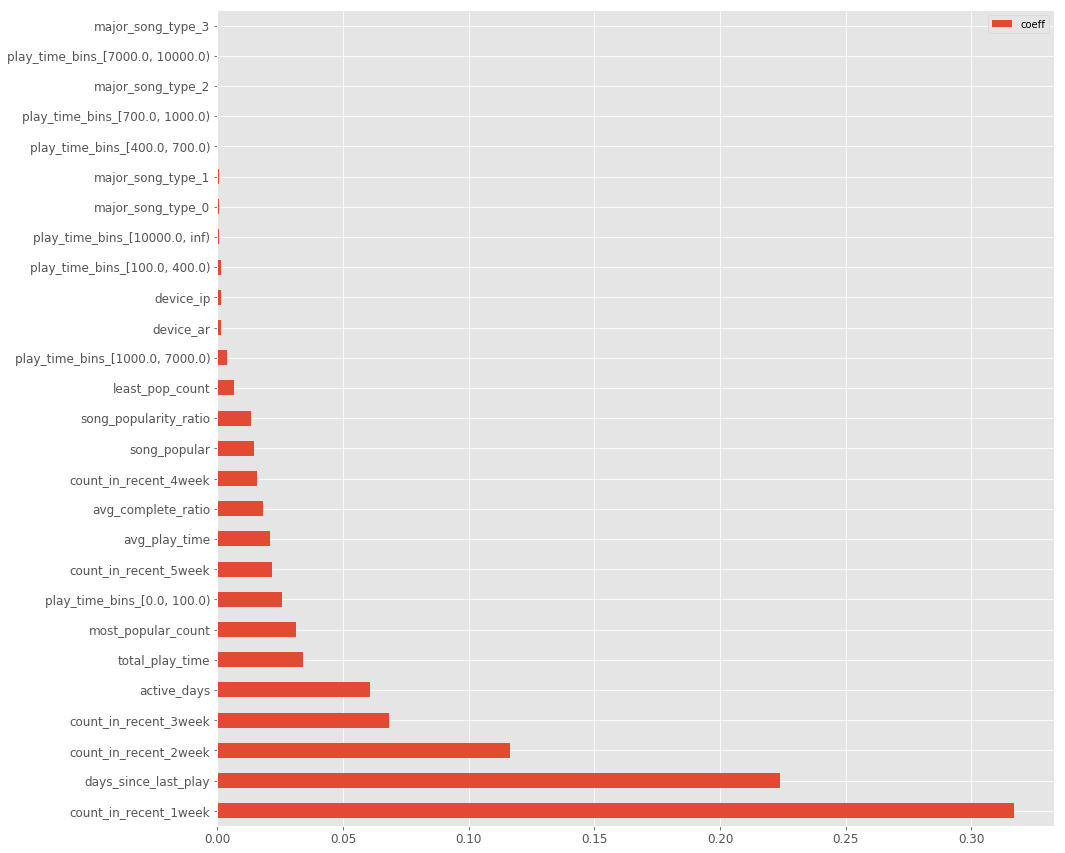

In [95]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
ax.tick_params(axis='both', which='major', labelsize=12)
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

In [82]:
selected_features_rfc = df_coeffs.loc[df_coeffs.coeff >=0.005, 'feature']

In [85]:
selected_features_rfc = selected_features_rfc.tolist()

In [86]:
selected_features_rfc

['count_in_recent_1week',
 'days_since_last_play',
 'count_in_recent_2week',
 'count_in_recent_3week',
 'active_days',
 'total_play_time',
 'most_popular_count',
 'play_time_bins_[0.0, 100.0)',
 'count_in_recent_5week',
 'avg_play_time',
 'avg_complete_ratio',
 'count_in_recent_4week',
 'song_popular',
 'song_popularity_ratio',
 'least_pop_count']

In [87]:
df_selected_features_rfc = df.loc[:,selected_features_rfc]
df_selected_features_rfc.head()

,count_in_recent_1week,days_since_last_play,count_in_recent_2week,count_in_recent_3week,active_days,total_play_time,most_popular_count,"play_time_bins_[0.0, 100.0)",count_in_recent_5week,avg_play_time,avg_complete_ratio,count_in_recent_4week,song_popular,song_popularity_ratio,least_pop_count
uid,,,,,,,,,,,,,,,
100077577,0,22,0,0,1,3.466667,10.0,NaN,0,12.235294,0.751198,17,0.176471,0.176471,0.0
100419770,0,13,0,38,7,115335.033333,15.0,NaN,0,130567.962264,1.000000,15,0.113208,0.113208,1.0
100474444,0,21,0,0,1,113.666667,67.0,NaN,0,98.840580,0.414544,69,0.579710,0.579710,0.0
100751531,0,48,0,0,3,42.183333,13.0,NaN,26,97.346154,0.451495,0,0.346154,0.346154,4.0
101231687,169,0,83,368,14,2962.783333,557.0,NaN,0,235.158093,0.886859,177,0.196989,0.196989,0.0


In [88]:
df_selected_features_rfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73494 entries, 100077577 to 99996283
Data columns (total 15 columns):
count_in_recent_1week          73494 non-null int64
days_since_last_play           73494 non-null int64
count_in_recent_2week          73494 non-null int64
count_in_recent_3week          73494 non-null int64
active_days                    73494 non-null int64
total_play_time                73494 non-null float64
most_popular_count             73494 non-null float64
play_time_bins_[0.0, 100.0)    0 non-null float64
count_in_recent_5week          73494 non-null int64
avg_play_time                  73494 non-null float64
avg_complete_ratio             73494 non-null float64
count_in_recent_4week          73494 non-null int64
song_popular                   73494 non-null float64
song_popularity_ratio          73494 non-null float64
least_pop_count                73494 non-null float64
dtypes: float64(8), int64(7)
memory usage: 9.0+ MB


In [ ]:
play_time_bins_[0.0, 100.0)

In [ ]:
df_selected_features_rfc = df_selected_features_rfc.drop(df_rfc_selected_features = 

### Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression

model_lrc = LogisticRegression(penalty = 'l2',C= 1, n_jobs = -1)

In [28]:
model_lrc.fit(X_train, y_train)
model_lrc.score(X_train, y_train), model_lr.score(X_test, y_test)

(0.86171639615122941, 0.86189849879813141)

In [29]:
roc_auc_score(y_test, model_lr.predict(X_test))

0.82897888426497368

#### Test model stability with cross validation

In [30]:
scores_lrc = cross_val_score(model_lrc, X_train, y_train, cv=5)
print scores_lrc

[ 0.85801749  0.86482021  0.86189134  0.86275272  0.86148911]


In [31]:
lrc = LogisticRegression (n_jobs = -1, random_state = 42)

In [34]:
# Tune model parameters for Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

C1 = [1e-3,1e-2,0.1,1,10,100,1000]

param_grid = [{'penalty': ['l1'], 'C': C1},
              {'penalty': ['l2'], 'C': C1}]

scores = ['accuracy']

for score in scores:
    print ("# Tuning hyper-parameters for %s" % score + "\n\n")
    cv_lrc= GridSearchCV(lrc,
                       param_grid,
                       cv = 2,
                       scoring = score)
    cv_lrc.fit(X_train[:20000, :], y_train[:20000])
    print ("Best parameters set found on ")
    print (cv_lrc.best_params_)
    print ("\nGrid scores on development set:")
    means = cv_lrc.cv_results_["mean_test_score"]
    stds = cv_lrc.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, cv_lrc.cv_results_['params']):
        print("%0.3f (+/-%0.3f) for %r"
               % (mean, std*2, params))
    print ("\nDetailed classificationi report:\n")
    print ("The model is strained on the full develpment set.")
    print ("The scores are computed on the full evaluation set.")
    print ("\n")
    y_true, y_pred = y_test, cv_lrc.predict(X_test)
    print (classification_report(y_true, y_pred))
    print ("\n")

    

# Tuning hyper-parameters for accuracy


Best parameters set found on 
{'penalty': 'l1', 'C': 10}

Grid scores on development set:
0.859 (+/-0.003) for {'penalty': 'l1', 'C': 0.001}
0.862 (+/-0.002) for {'penalty': 'l1', 'C': 0.01}
0.865 (+/-0.002) for {'penalty': 'l1', 'C': 0.1}
0.866 (+/-0.002) for {'penalty': 'l1', 'C': 1}
0.866 (+/-0.002) for {'penalty': 'l1', 'C': 10}
0.866 (+/-0.002) for {'penalty': 'l1', 'C': 100}
0.866 (+/-0.003) for {'penalty': 'l1', 'C': 1000}
0.856 (+/-0.007) for {'penalty': 'l2', 'C': 0.001}
0.859 (+/-0.005) for {'penalty': 'l2', 'C': 0.01}
0.859 (+/-0.004) for {'penalty': 'l2', 'C': 0.1}
0.860 (+/-0.003) for {'penalty': 'l2', 'C': 1}
0.856 (+/-0.010) for {'penalty': 'l2', 'C': 10}
0.859 (+/-0.005) for {'penalty': 'l2', 'C': 100}
0.857 (+/-0.008) for {'penalty': 'l2', 'C': 1000}

Detailed classificationi report:

The model is strained on the full develpment set.
The scores are computed on the full evaluation set.


             precision    recall  f1-score

### The best parameters for Logistic Regression model are found:

{'penalty': 'l1', 'C': 10}

In [36]:
model_lrc_tuned = LogisticRegression(penalty = 'l1', C =10 , n_jobs = -1,random_state = 42)

model_lrc_tuned.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
model_lrc.score(X_train, y_train), model_lrc.score(X_test, y_test)

(0.86171639615122941, 0.86189849879813141)

In [39]:
roc_auc_score(y_test, model_lrc_tuned.predict(X_test))

0.84841029573641391

In [38]:
model_lrc.coef_.shape

(1, 27)

In [40]:
model_lrc.coef_

array([[ -2.06144545e-03,  -2.06144545e-03,  -2.30914849e-09,
         -7.07457338e-09,  -1.22212560e-02,   2.71400105e-04,
         -1.31420310e-02,   5.61408806e-04,  -3.38720954e-05,
          2.35882955e-04,   3.62345000e-02,  -1.29107723e-02,
          1.21978113e-01,  -1.17377864e-01,  -1.43835876e-02,
         -9.40225131e-03,  -2.31467154e-02,  -1.87837111e-04,
         -4.51482268e-04,   1.95924259e-07,  -1.26457469e-02,
         -1.30667773e-02,  -6.35399716e-04,  -2.48377953e-04,
          9.54562168e-04,  -4.99454704e-07,   1.85640026e-03]])

In [45]:
# Number of important features:
sum(abs(model_lrc_tuned.coef_[0])>0.1)

13

In [60]:
columns = list(df_dummies.columns)
coeffs_lrc = model_lrc_tuned.coef_[0]
df_coeffs_lrc = pd.DataFrame(list(zip(columns, coeffs_lrc))).sort_values(by=[1], ascending=False)
df_coeffs_lrc.columns = ['feature', 'coeff']
df_coeffs_lrc

,feature,coeff
26,"play_time_bins_[10000.0, inf)",8.987669e-01
1,song_popularity_ratio,3.289505e-01
0,song_popular,2.973556e-01
10,count_in_recent_5week,1.879359e-01
12,days_since_last_play,1.740305e-01
11,avg_complete_ratio,1.046850e-01
22,"play_time_bins_[400.0, 700.0)",4.332883e-02
20,"play_time_bins_[0.0, 100.0)",2.454061e-02
7,count_in_recent_2week,9.893171e-04
9,count_in_recent_4week,7.300440e-04


In [55]:
import matplotlib.pyplot as plt

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

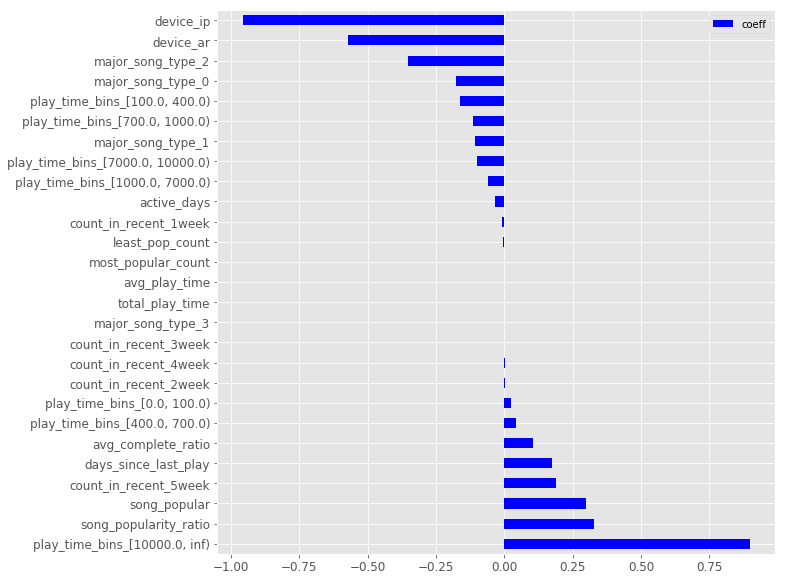

In [98]:
ax = df_coeffs_lrc.plot.barh(color = 'b')
t = df_coeffs_lrc.shape[0]
ax.set_yticklabels(df_coeffs_lrc['feature'])
ax.tick_params(axis='both', which='major', labelsize=12)
plt.rcParams["figure.figsize"] = (10,15)
plt.show()

In [64]:
# List of important features:
df_coeffs_lrc_important = df_coeffs_lrc.loc[df_coeffs_lrc['coeff'].apply(lambda x: abs(x)) >0.1]
df_coeffs_lrc_important

,feature,coeff
26,"play_time_bins_[10000.0, inf)",0.898767
1,song_popularity_ratio,0.328951
0,song_popular,0.297356
10,count_in_recent_5week,0.187936
12,days_since_last_play,0.174030
11,avg_complete_ratio,0.104685
17,major_song_type_1,-0.108322
23,"play_time_bins_[700.0, 1000.0)",-0.113136
21,"play_time_bins_[100.0, 400.0)",-0.162982
16,major_song_type_0,-0.177554


In [68]:
df_coeffs_lrc_important.shape[0]

13

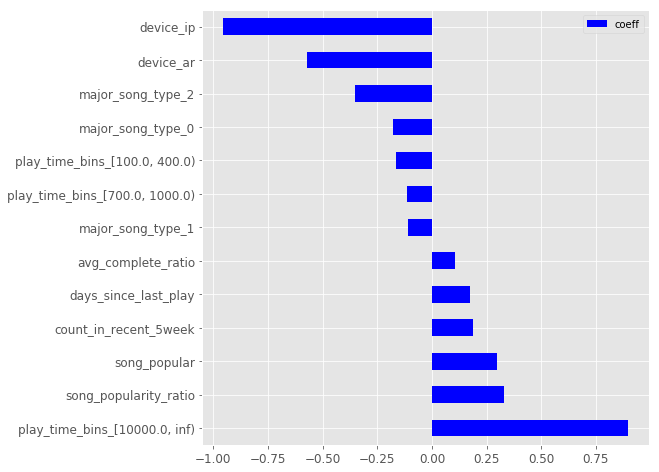

In [78]:
# Zoom in the important features:
ax = df_coeffs_lrc_important.plot.barh(color = 'b')
t = df_coeffs_lrc_important.shape[0]
ax.set_yticklabels(df_coeffs_lrc_important['feature'])
ax.tick_params(axis='both', which='major', labelsize=12)
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

In [137]:
user_profile= df_coeffs_lrc_important.feature.tolist()

In [138]:
user_profile

['play_time_bins_[10000.0, inf)',
 'song_popularity_ratio',
 'song_popular',
 'count_in_recent_5week',
 'days_since_last_play',
 'avg_complete_ratio',
 'major_song_type_1',
 'play_time_bins_[700.0, 1000.0)',
 'play_time_bins_[100.0, 400.0)',
 'major_song_type_0',
 'major_song_type_2',
 'device_ar',
 'device_ip']

In [140]:
df_user_profile = df_coeffs_lrc_important.loc\
                df_user_profile['odds_ratio'] = df_user_profile.coeff.apply(np.exp)


In [141]:
df_user_profile.head()

,feature,coeff
26,"play_time_bins_[10000.0, inf)",0.898767
1,song_popularity_ratio,0.328951
0,song_popular,0.297356
10,count_in_recent_5week,0.187936
12,days_since_last_play,0.174030


In [143]:
df_user_profile['odds_ratio'] = df_user_profile.coeff.apply(np.exp)
df_user_profile

,feature,coeff,odds_ratio
26,"play_time_bins_[10000.0, inf)",0.898767,2.456572
1,song_popularity_ratio,0.328951,1.389509
0,song_popular,0.297356,1.346294
10,count_in_recent_5week,0.187936,1.206756
12,days_since_last_play,0.174030,1.190092
11,avg_complete_ratio,0.104685,1.110361
17,major_song_type_1,-0.108322,0.897338
23,"play_time_bins_[700.0, 1000.0)",-0.113136,0.893029
21,"play_time_bins_[100.0, 400.0)",-0.162982,0.849606
16,major_song_type_0,-0.177554,0.837316


In [ ]:
df_user_profile_cate = df_user_profile.loc[df_user_profile.feature.isin(['device_ip',\
                        'no_popular_song','least_popular_count_0','all_complete']),:]
df_user_profile_cate

In [145]:
df_user_profile['churn_proba'] = df_user_profile.odds_ratio.apply(lambda x: x/(1+x))
df_user_profile

,feature,coeff,odds_ratio,churn_proba
26,"play_time_bins_[10000.0, inf)",0.898767,2.456572,0.710696
1,song_popularity_ratio,0.328951,1.389509,0.581504
0,song_popular,0.297356,1.346294,0.573796
10,count_in_recent_5week,0.187936,1.206756,0.546846
12,days_since_last_play,0.174030,1.190092,0.543398
11,avg_complete_ratio,0.104685,1.110361,0.526147
17,major_song_type_1,-0.108322,0.897338,0.472946
23,"play_time_bins_[700.0, 1000.0)",-0.113136,0.893029,0.471746
21,"play_time_bins_[100.0, 400.0)",-0.162982,0.849606,0.459344
16,major_song_type_0,-0.177554,0.837316,0.455728


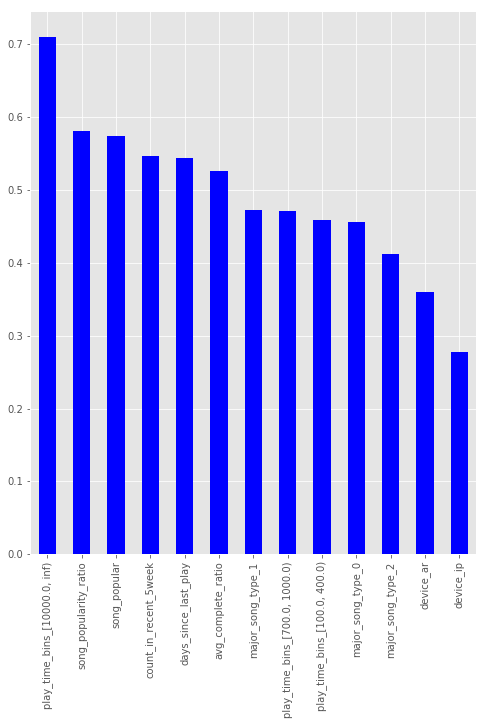

In [151]:
ax = df_user_profile.loc[:,'churn_proba'].plot.bar(color = 'b')
t = np.arange(df_user_profile.shape[0])
ax.set_xticks(t)
ax.set_xticklabels(df_user_profile['feature'],rotation = 90)
plt.rcParams["figure.figsize"] = (8,10)
plt.show()

### Profit curve

In [126]:
from sklearn.metrics import confusion_matrix

def standard_confusion_matrix(y_true, y_predict):
    """Given y and predicted y, generate standard orientation
    
    Args:
    =====
    numpy array: y_true - array of true label
    numpy array: y_predict - array of predicted label
    
    Return:
    ======:
    numpy array: confusion matrix, 2x2 numpy array
    """
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_predict)
    return np.array([[tp, fp], [fn, tn]])


def profit_curve(cost_benefit_matrix, probabilities, y_true):
    """Given cost-benefit matrix, predicted probability, 
    and true label, calculate expected profit associated with 
    each threshold.
    
    Args:
    =====
    numpy array: cost_benefit_matrix, 2x2 array
    numpy array: probabilities - array of predicted probabilities
    numpy array: y_true - array of true label
    
    Return:
    ======:
    numpy array: threshold
    numpy array: profit
    """
    #thresholds = sorted(set(probabilities), reverse=True)   
    thresholds = np.linspace(1,0,1000)
    profits = []
    i = 0
    for threshold in thresholds:
        print 'checking %dth threshold...' %i
        y_predict = probabilities > threshold
        confusion_mat = standard_confusion_matrix(y_true, y_predict)
        profit = np.sum(confusion_mat * cost_benefit_matrix) / float(len(y_true))
        profits.append(profit)
        i = i+1
    return thresholds, profits


def plot_profit_model(profits, label="Logistic Regression"):
    """Plot profits against pertentage of test instance
    """
    percentages = np.linspace(0, 100, len(profits))
    plt.plot(percentages, profits, label=label)
    plt.title("Profit Curve")
    plt.xlabel("Percentage of test instances (decreasing by score)")
    plt.ylabel("Profit")
    plt.legend(loc='best')
    plt.savefig('profit_curve.png')
    plt.show()
    
def find_best_threshold(thresholds, profits):
    """Find the best threshold that gives max profit
    
    Args:
    =====
    numpy array: thresholds - array of sorted threshold
    numpy array: profits - array of profits
    
    Return:
    ======:
    float: threshold that corresponds to max profit
    float: max profit
    """
    return thresholds[np.argmax(profits)],np.max(profits)

In [118]:
len(set(probabilities))

17387

In [154]:
costbenefit =  np.array([[10,-5],[-10,0]])
costbenefit 

array([[ 10,  -5],
       [-10,   0]])

                                      Confusion Matrix

|   TP   |   FP   |
|--------|--------|
|   FN   |   TN   |

In [120]:
X_test.shape

(22049, 27)

In [121]:
# Make prediction on the probabilities
probabilities = model_rfc_tuned.predict_proba(X_test)[:, 1]
probabilities.shape

(22049,)

In [122]:
probabilities[:10],y_test[:10]

(array([ 0.99947368,  0.32762453,  0.84747508,  0.76093056,  1.        ,
         0.01749144,  0.74195566,  0.06180343,  0.05092459,  0.71819163]),
 array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1]))

In [123]:
AUC = roc_auc_score(y_test, probabilities>0.5)
AUC

0.86394660899077569

In [124]:
standard_confusion_matrix(y_test, probabilities>0.5)

array([[13677,  1469],
       [ 1052,  5851]])

In [155]:
# Calculate expected profits corresponding to different threshold
thresholds, profits = profit_curve(costbenefit, probabilities, y_test)

checking 0th threshold...
checking 1th threshold...
checking 2th threshold...
checking 3th threshold...
checking 4th threshold...
checking 5th threshold...
checking 6th threshold...
checking 7th threshold...
checking 8th threshold...
checking 9th threshold...
checking 10th threshold...
checking 11th threshold...
checking 12th threshold...
checking 13th threshold...
checking 14th threshold...
checking 15th threshold...
checking 16th threshold...
checking 17th threshold...
checking 18th threshold...
checking 19th threshold...
checking 20th threshold...
checking 21th threshold...
checking 22th threshold...
checking 23th threshold...
checking 24th threshold...
checking 25th threshold...
checking 26th threshold...
checking 27th threshold...
checking 28th threshold...
checking 29th threshold...
checking 30th threshold...
checking 31th threshold...
checking 32th threshold...
checking 33th threshold...
checking 34th threshold...
checking 35th threshold...
checking 36th threshold...
checking 37

checking 300th threshold...
checking 301th threshold...
checking 302th threshold...
checking 303th threshold...
checking 304th threshold...
checking 305th threshold...
checking 306th threshold...
checking 307th threshold...
checking 308th threshold...
checking 309th threshold...
checking 310th threshold...
checking 311th threshold...
checking 312th threshold...
checking 313th threshold...
checking 314th threshold...
checking 315th threshold...
checking 316th threshold...
checking 317th threshold...
checking 318th threshold...
checking 319th threshold...
checking 320th threshold...
checking 321th threshold...
checking 322th threshold...
checking 323th threshold...
checking 324th threshold...
checking 325th threshold...
checking 326th threshold...
checking 327th threshold...
checking 328th threshold...
checking 329th threshold...
checking 330th threshold...
checking 331th threshold...
checking 332th threshold...
checking 333th threshold...
checking 334th threshold...
checking 335th thres

checking 595th threshold...
checking 596th threshold...
checking 597th threshold...
checking 598th threshold...
checking 599th threshold...
checking 600th threshold...
checking 601th threshold...
checking 602th threshold...
checking 603th threshold...
checking 604th threshold...
checking 605th threshold...
checking 606th threshold...
checking 607th threshold...
checking 608th threshold...
checking 609th threshold...
checking 610th threshold...
checking 611th threshold...
checking 612th threshold...
checking 613th threshold...
checking 614th threshold...
checking 615th threshold...
checking 616th threshold...
checking 617th threshold...
checking 618th threshold...
checking 619th threshold...
checking 620th threshold...
checking 621th threshold...
checking 622th threshold...
checking 623th threshold...
checking 624th threshold...
checking 625th threshold...
checking 626th threshold...
checking 627th threshold...
checking 628th threshold...
checking 629th threshold...
checking 630th thres

checking 890th threshold...
checking 891th threshold...
checking 892th threshold...
checking 893th threshold...
checking 894th threshold...
checking 895th threshold...
checking 896th threshold...
checking 897th threshold...
checking 898th threshold...
checking 899th threshold...
checking 900th threshold...
checking 901th threshold...
checking 902th threshold...
checking 903th threshold...
checking 904th threshold...
checking 905th threshold...
checking 906th threshold...
checking 907th threshold...
checking 908th threshold...
checking 909th threshold...
checking 910th threshold...
checking 911th threshold...
checking 912th threshold...
checking 913th threshold...
checking 914th threshold...
checking 915th threshold...
checking 916th threshold...
checking 917th threshold...
checking 918th threshold...
checking 919th threshold...
checking 920th threshold...
checking 921th threshold...
checking 922th threshold...
checking 923th threshold...
checking 924th threshold...
checking 925th thres

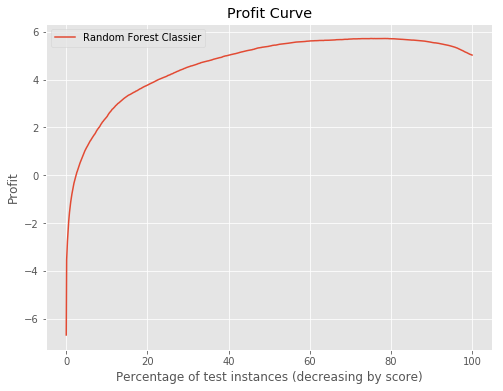

In [156]:
# Plot!
plt.rcParams["figure.figsize"] = (8,6)
plot_profit_model(profits, label="Random Forest Classier")

In [157]:
best_threshold, max_profit = find_best_threshold(thresholds, profits)
print("The best threshold is {}, which gives a max profit of {}".format(best_threshold, max_profit))

The best threshold is 0.215215215215, which gives a max profit of 5.71567871559


In [158]:
y_predict = [int(x) for x in (probabilities > best_threshold)]
standard_confusion_matrix(y_test, y_predict)

array([[14419,  3013],
       [  310,  4307]])

In [159]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
def print_results(y_true, y_pred):
    print("Accuracy: {}".format(accuracy_score(y_true, y_pred)))
    print("Precision: {}".format(precision_score(y_true, y_pred)))
    print("Recall: {}".format(recall_score(y_true, y_pred)))
    print("f1-score: {}".format(f1_score(y_true, y_pred)))

In [132]:
print_results(y_test, probabilities > best_threshold)

Accuracy: 0.886525466008
Precision: 0.891715255975
Recall: 0.944870663317
f1-score: 0.917523734177
